In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as st
warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.style.use('seaborn')

df = pd.read_csv('hotel_booking_city_hotel.csv')

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,6.0,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,City Hotel,1,88,2015,July,27,1,0,4,2,...,No Deposit,9.0,NaN,0,Transient,76.50,0,1,Canceled,2015-07-01
2,City Hotel,1,65,2015,July,27,1,0,4,1,...,No Deposit,9.0,NaN,0,Transient,68.00,0,1,Canceled,2015-04-30
3,City Hotel,1,92,2015,July,27,1,2,4,2,...,No Deposit,9.0,NaN,0,Transient,76.50,0,2,Canceled,2015-06-23
4,City Hotel,1,100,2015,July,27,2,0,2,2,...,No Deposit,9.0,NaN,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79325,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
79326,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
79327,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
79328,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## DATA CLEANING

In [4]:
df[df.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
9,City Hotel,1,62,2015,July,27,2,2,3,2,...,No Deposit,8.0,NaN,0,Transient,76.50,0,1,No-Show,2015-07-02
12,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
17,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
18,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
22,City Hotel,0,43,2015,July,27,3,0,2,2,...,No Deposit,1.0,NaN,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79289,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
79292,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
79293,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
79294,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [5]:
df = df.drop_duplicates()

In [6]:
df.shape

(53428, 32)

Dataset memiliki 53428 baris dan 32 kolom variabel

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53428 entries, 0 to 79329
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           53428 non-null  object 
 1   is_canceled                     53428 non-null  int64  
 2   lead_time                       53428 non-null  int64  
 3   arrival_date_year               53428 non-null  int64  
 4   arrival_date_month              53428 non-null  object 
 5   arrival_date_week_number        53428 non-null  int64  
 6   arrival_date_day_of_month       53428 non-null  int64  
 7   stays_in_weekend_nights         53428 non-null  int64  
 8   stays_in_week_nights            53428 non-null  int64  
 9   adults                          53428 non-null  int64  
 10  children                        53424 non-null  float64
 11  babies                          53428 non-null  int64  
 12  meal                            

### Data Type
Date data is still in the form of float, including reservation status date data in the form of objects, the data can be converted into date data types according to the information in the data that shows the date of an activity.
and the children's data is still in the form of a float not an integer, but the children's data still has a missing value, so to change it, it is necessary to fill in the missing value

In [9]:
df['arrival_date'] = pd.to_datetime(df.arrival_date_year.astype(str) +'-'+df.arrival_date_month.astype(str) + '-' + df.arrival_date_day_of_month.astype(str))
df['arrival_date']

0       2015-07-01
1       2015-07-01
2       2015-07-01
3       2015-07-01
4       2015-07-02
           ...    
79325   2017-08-30
79326   2017-08-31
79327   2017-08-31
79328   2017-08-31
79329   2017-08-29
Name: arrival_date, Length: 53428, dtype: datetime64[ns]

In [10]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [11]:
df = df.drop(['arrival_date_year', 'arrival_date_day_of_month'],axis=1)

In [12]:
df['is_repeated_guest'] = df['is_repeated_guest'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53428 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           53428 non-null  object        
 1   is_canceled                     53428 non-null  int64         
 2   lead_time                       53428 non-null  int64         
 3   arrival_date_month              53428 non-null  object        
 4   arrival_date_week_number        53428 non-null  int64         
 5   stays_in_weekend_nights         53428 non-null  int64         
 6   stays_in_week_nights            53428 non-null  int64         
 7   adults                          53428 non-null  int64         
 8   children                        53424 non-null  float64       
 9   babies                          53428 non-null  int64         
 10  meal                            53428 non-null  object        
 11  co

### Missing Value

In [13]:
df.isnull().sum().sort_values(ascending=False)[:10]

company                     50646
agent                        5587
country                         6
children                        4
arrival_date                    0
distribution_channel            0
is_canceled                     0
lead_time                       0
arrival_date_month              0
arrival_date_week_number        0
dtype: int64

Based on **Dan Berdikulov** (medium.com/Dealing with missing data), the process of **eliminating a variable** can be carried out when there is a missing value of **60% / 70% of the missing data**.

#### Big percentage of missing data:
company : 95.34% | agent : 10.24% | country : < 1% | children : < 1%

- Therefore, **company** data can be **dropped** from the hotel data frame (df), for other data, namely **country and children**, it will **filling in the missing value** with the median, mode or the mean because it has a missing value <= 7%, so the possibility of affecting the data will be very small.
- For **agent** data itself, it is the id data of the agent so it would be better to use the mode value, or **variable deletion** because these variables are also not needed when doing EDA

In [14]:
df = df.drop(['company','agent'],axis=1)

In [15]:
from scipy.stats import norm

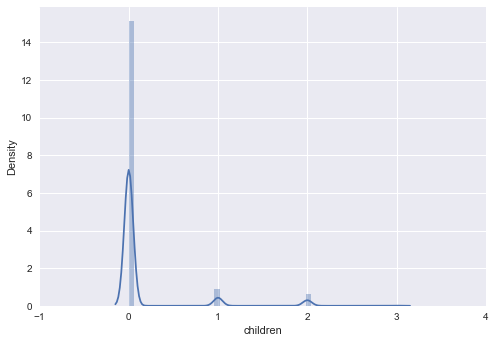

besar skew : 3.492049756518533


In [16]:
fig, ax = plt.subplots()
sns.distplot(df['children'], ax=ax)
ax.set_xlim(-1, 4)
plt.show()
print ("besar skew :", df['children'].skew())

According to Arun Amballa (Part-1 Mean/ Median Imputation, medium.com,2020) , for data that **skew the use of the median is more recommended** than using the mean to fill in the missing value.

If we look at the graph below, we can see that the median and mean values for **children** data have the same value, namely 0.

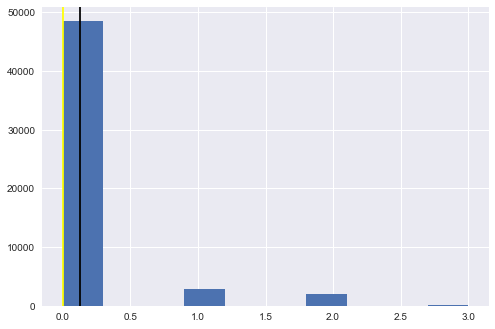

In [17]:
plt.hist(df['children'])
plt.axvline(df['children'].median(),color='yellow')
plt.axvline(df['children'].mean(),color='black')
plt.show()

In [1]:
mean_children = df['children'].mean()
median_children = df['children'].median()
print('Mean of the children data : {}\n'.format(mean_children))
print('Median of the children data : {}\n'.format(median_children))
print('The mean data has a comma value because the data form children are floats not integers')

NameError: name 'df' is not defined

In [17]:
df['children'] = df['children'].fillna(median_children)

#menganti data type dari children
df['children'] = df['children'].astype('int64')

In [18]:
df['country'].unique()

array(['PRT', 'ITA', 'ESP', 'DEU', 'FRA', 'NLD', 'GBR', 'ROU', 'BRA',
       'SWE', 'AUT', 'AGO', 'BEL', 'CHE', 'NOR', 'RUS', 'ISR', 'IRL',
       'POL', 'CHN', 'USA', 'MAR', 'AUS', 'MOZ', 'TUN', 'DNK', 'MEX',
       'GRC', 'DZA', 'COL', 'LUX', 'CN', 'LVA', 'FIN', 'HRV', 'STP',
       'BGR', 'UKR', 'VEN', 'TWN', 'IRN', 'KOR', 'TUR', 'BLR', 'JPN',
       'CZE', 'HUN', 'AZE', 'KAZ', 'IND', 'NZL', 'IDN', 'LTU', 'LBN',
       'SRB', 'SVN', 'SVK', 'MYS', 'CMR', 'CHL', 'ARG', nan, 'SGP', 'SEN',
       'PER', 'EGY', 'SAU', 'KNA', 'JOR', 'ZAF', 'THA', 'KWT', 'LKA',
       'ALB', 'ETH', 'PHL', 'ARE', 'ECU', 'OMN', 'IRQ', 'AND', 'CPV',
       'MUS', 'HND', 'NGA', 'RWA', 'EST', 'PAK', 'GEO', 'GIB', 'ZMB',
       'QAT', 'KHM', 'HKG', 'MCO', 'BGD', 'ISL', 'UZB', 'URY', 'IMN',
       'TJK', 'ARM', 'MDV', 'NIC', 'GGY', 'BEN', 'MAC', 'CYP', 'VGB',
       'MLT', 'CRI', 'TZA', 'JEY', 'GAB', 'MKD', 'BIH', 'VNM', 'GHA',
       'TMP', 'GLP', 'KEN', 'PRI', 'DOM', 'LIE', 'GNB', 'BHR', 'MNE',
       'UMI', 'M

Melakukan penggantian data yang hilang dengan nilai mode dapat dilakukan pada data bertipe kategorikal. (Ajitesh Kumar,2020)

In [19]:
mode_country = df['country'].mode()[0]

df['country'] = df['country'].fillna(mode_country)

In [20]:
df.isnull().sum().sort_values(ascending=False)[:10]

arrival_date                0
distribution_channel        0
is_canceled                 0
lead_time                   0
arrival_date_month          0
arrival_date_week_number    0
stays_in_weekend_nights     0
stays_in_week_nights        0
adults                      0
children                    0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53428 entries, 0 to 79329
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           53428 non-null  object        
 1   is_canceled                     53428 non-null  int64         
 2   lead_time                       53428 non-null  int64         
 3   arrival_date_month              53428 non-null  object        
 4   arrival_date_week_number        53428 non-null  int64         
 5   stays_in_weekend_nights         53428 non-null  int64         
 6   stays_in_week_nights            53428 non-null  int64         
 7   adults                          53428 non-null  int64         
 8   children                        53428 non-null  int64         
 9   babies                          53428 non-null  int64         
 10  meal                            53428 non-null  object        
 11  co

### Outlier

In [22]:
df.describe()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000
mean,0.300386,77.678521,26.637606,0.872164,2.274444,1.876338,0.131841,0.007337,0.035768,0.191491,0.246369,1.020233,110.985944,0.035618,0.710994
std,0.458430,82.113381,13.586280,0.913756,1.618630,0.544292,0.442161,0.102665,0.372784,2.038798,0.704063,11.901703,48.062518,0.186244,0.833540
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,14.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,84.000000,0.000000,0.000000
50%,0.000000,50.000000,27.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.300000,0.000000,1.000000
75%,1.000000,118.000000,37.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,629.000000,53.000000,16.000000,41.000000,4.000000,3.000000,10.000000,21.000000,72.000000,21.000000,391.000000,5400.000000,3.000000,5.000000


If the value of a certain standard deviation differs greatly from the mean, the data variable is identified as having outliers because the data distribution is greater than the mean value (abnormal results, data bias).

#### Data that has the possibility of outliers
lead_time,stays_in_weekend_nights,stays_in_week_nights,children,babies,previous_cancellations,previous_bookings_not_cancelled,booking_changes,days_in_waiting_list,adr, required_car_parking_spaces,total_of_special_requests

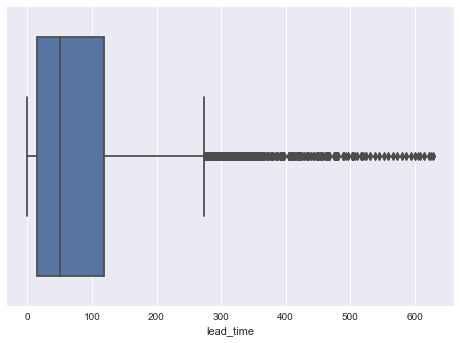

In [23]:
sns.boxplot(df['lead_time']);

In [24]:
df.loc[(df['lead_time']>=460)]

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
18416,City Hotel,1,461,October,42,0,1,1,0,0,...,0,Non Refund,0,Transient,59.00,0,0,Canceled,2015-10-21,2016-10-13
18435,City Hotel,1,461,October,42,0,2,2,0,0,...,0,Non Refund,0,Transient,62.00,0,0,Canceled,2015-10-21,2016-10-13
18819,City Hotel,1,605,October,43,1,2,2,0,0,...,0,Non Refund,0,Transient,60.00,0,0,Canceled,2016-09-20,2016-10-17
18923,City Hotel,1,468,October,43,0,1,1,0,0,...,0,Non Refund,0,Transient,59.00,0,0,Canceled,2015-10-21,2016-10-20
18927,City Hotel,1,468,October,43,0,2,2,0,0,...,0,Non Refund,0,Transient,62.00,0,0,Canceled,2015-10-21,2016-10-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78216,City Hotel,0,504,August,32,2,4,2,0,0,...,1,No Deposit,0,Transient-Party,101.33,0,1,Check-Out,2017-08-18,2017-08-12
78241,City Hotel,0,504,August,32,2,4,2,0,0,...,1,No Deposit,0,Transient-Party,101.33,0,1,Check-Out,2017-08-18,2017-08-12
78993,City Hotel,0,518,August,34,2,1,2,0,0,...,0,No Deposit,0,Transient-Party,112.67,0,1,Check-Out,2017-08-29,2017-08-26
78997,City Hotel,0,518,August,34,2,1,2,0,0,...,0,No Deposit,0,Transient-Party,112.67,0,1,Check-Out,2017-08-29,2017-08-26


In [25]:
df.loc[(df['lead_time']>=460) & (df['is_canceled']==1)]

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
18416,City Hotel,1,461,October,42,0,1,1,0,0,...,0,Non Refund,0,Transient,59.0,0,0,Canceled,2015-10-21,2016-10-13
18435,City Hotel,1,461,October,42,0,2,2,0,0,...,0,Non Refund,0,Transient,62.0,0,0,Canceled,2015-10-21,2016-10-13
18819,City Hotel,1,605,October,43,1,2,2,0,0,...,0,Non Refund,0,Transient,60.0,0,0,Canceled,2016-09-20,2016-10-17
18923,City Hotel,1,468,October,43,0,1,1,0,0,...,0,Non Refund,0,Transient,59.0,0,0,Canceled,2015-10-21,2016-10-20
18927,City Hotel,1,468,October,43,0,2,2,0,0,...,0,Non Refund,0,Transient,62.0,0,0,Canceled,2015-10-21,2016-10-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32952,City Hotel,1,504,August,32,2,1,1,0,0,...,0,No Deposit,0,Transient-Party,80.0,0,0,Canceled,2017-08-04,2017-08-12
33050,City Hotel,1,507,August,33,0,1,2,0,0,...,0,Non Refund,0,Transient,90.0,0,0,Canceled,2017-08-04,2017-08-15
33499,City Hotel,1,518,August,34,2,1,2,0,0,...,0,No Deposit,0,Transient-Party,90.0,0,0,Canceled,2017-08-10,2017-08-26
33502,City Hotel,1,518,August,34,2,1,1,0,0,...,0,No Deposit,0,Transient-Party,80.0,0,0,Canceled,2017-08-10,2017-08-26


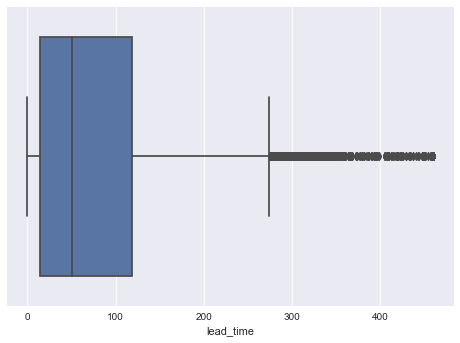

In [26]:
df.loc[(df['lead_time']>460),'lead_time'] = 460
sns.boxplot(df['lead_time']);

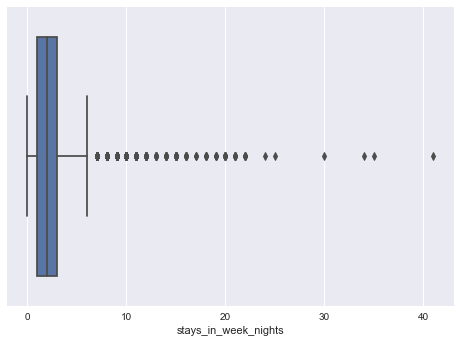

In [27]:
sns.boxplot(df['stays_in_week_nights']);

In [28]:
df.loc[(df['stays_in_week_nights']>=6)]

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
38,City Hotel,1,72,July,28,3,6,2,0,0,...,0,No Deposit,0,Transient,76.50,0,1,Canceled,2015-06-25,2015-07-06
53,City Hotel,0,54,July,28,2,8,2,0,0,...,0,No Deposit,0,Transient,62.37,0,0,Check-Out,2015-07-17,2015-07-07
54,City Hotel,1,90,July,28,5,15,1,0,0,...,0,No Deposit,0,Transient,48.60,0,0,Canceled,2015-04-08,2015-07-07
55,City Hotel,1,90,July,28,5,15,1,0,0,...,0,No Deposit,0,Transient,48.60,0,0,Canceled,2015-04-11,2015-07-07
56,City Hotel,1,117,July,28,5,15,1,0,0,...,0,No Deposit,0,Transient,48.60,0,0,Canceled,2015-04-08,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79195,City Hotel,0,190,August,34,2,7,2,0,0,...,0,No Deposit,0,Transient,80.10,0,1,Check-Out,2017-09-01,2017-08-23
79200,City Hotel,0,292,August,34,4,8,2,0,0,...,0,No Deposit,0,Transient,128.10,0,2,Check-Out,2017-09-01,2017-08-20
79232,City Hotel,0,75,August,34,2,8,2,0,0,...,0,No Deposit,0,Transient,81.00,0,0,Check-Out,2017-09-02,2017-08-23
79309,City Hotel,0,207,August,34,3,7,2,0,0,...,0,No Deposit,0,Transient,96.25,0,2,Check-Out,2017-09-04,2017-08-25


In [29]:
df.loc[(df['stays_in_week_nights']>=6)& (df['reservation_status']=="Check-Out")]

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
53,City Hotel,0,54,July,28,2,8,2,0,0,...,0,No Deposit,0,Transient,62.37,0,0,Check-Out,2015-07-17,2015-07-07
471,City Hotel,0,74,July,31,3,7,2,1,0,...,0,No Deposit,0,Transient,69.40,0,0,Check-Out,2015-08-06,2015-07-27
472,City Hotel,0,74,July,31,3,7,2,0,0,...,0,No Deposit,0,Transient,55.90,0,0,Check-Out,2015-08-06,2015-07-27
496,City Hotel,0,80,July,31,2,7,2,1,0,...,0,No Deposit,0,Transient-Party,75.79,0,1,Check-Out,2015-08-09,2015-07-31
497,City Hotel,0,80,July,31,2,7,2,0,0,...,0,No Deposit,0,Transient-Party,63.46,0,0,Check-Out,2015-08-09,2015-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79195,City Hotel,0,190,August,34,2,7,2,0,0,...,0,No Deposit,0,Transient,80.10,0,1,Check-Out,2017-09-01,2017-08-23
79200,City Hotel,0,292,August,34,4,8,2,0,0,...,0,No Deposit,0,Transient,128.10,0,2,Check-Out,2017-09-01,2017-08-20
79232,City Hotel,0,75,August,34,2,8,2,0,0,...,0,No Deposit,0,Transient,81.00,0,0,Check-Out,2017-09-02,2017-08-23
79309,City Hotel,0,207,August,34,3,7,2,0,0,...,0,No Deposit,0,Transient,96.25,0,2,Check-Out,2017-09-04,2017-08-25


In [30]:
Q1_siwn = df['stays_in_week_nights'].quantile(0.25)
Q3_siwn = df['stays_in_week_nights'].quantile(0.75)
IQR_siwn = Q3_siwn - Q1_siwn
lower_bound_siwn = Q1_siwn - 1.5*IQR_siwn
upper_bound_siwn = Q3_siwn + 1.5*IQR_siwn
print(upper_bound_siwn)

6.0


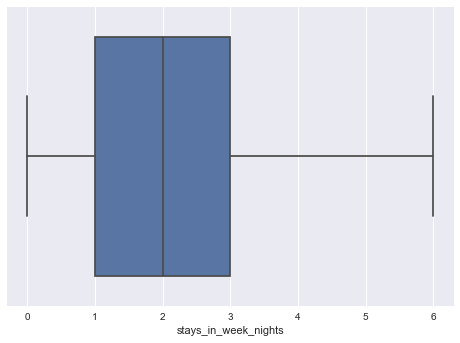

In [31]:
df.loc[(df['stays_in_week_nights']>upper_bound_siwn),'stays_in_week_nights'] = upper_bound_siwn
sns.boxplot(df['stays_in_week_nights']);

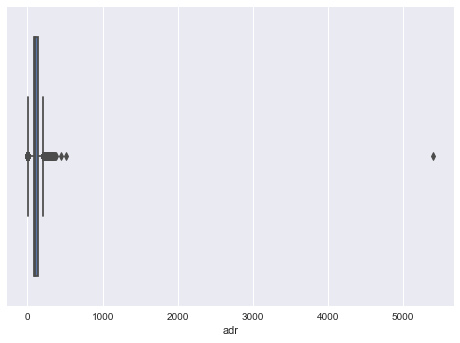

In [32]:
sns.boxplot(df['adr']);

In [33]:
df.loc[(df['adr']>=500)]

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
8455,City Hotel,1,35,March,13,0,1.0,2,0,0,...,1,Non Refund,0,Transient,5400.0,0,0,Canceled,2016-02-19,2016-03-25
71343,City Hotel,0,0,May,19,0,1.0,1,0,0,...,0,No Deposit,0,Transient,510.0,0,0,Check-Out,2017-05-10,2017-05-09


In [34]:
df.loc[(df['reservation_status']=="Check-Out") & (df['adr']>=500)]

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
71343,City Hotel,0,0,May,19,0,1.0,1,0,0,...,0,No Deposit,0,Transient,510.0,0,0,Check-Out,2017-05-10,2017-05-09


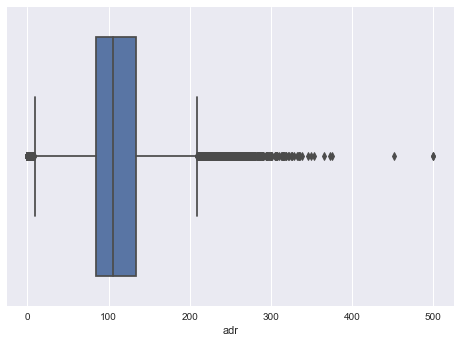

In [35]:
df.loc[(df['adr']>500),'adr'] = 500
df.loc[(0>df['adr']),'adr'] = 0
sns.boxplot(df['adr']);

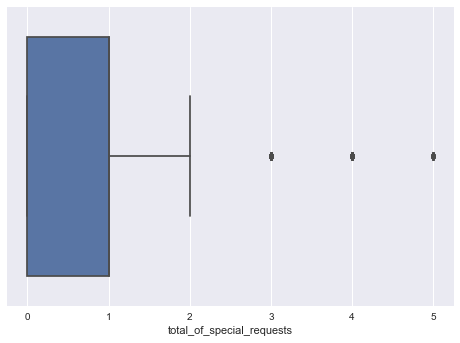

In [36]:
sns.boxplot(df['total_of_special_requests']);

In [37]:
Q1_totalreq = df['total_of_special_requests'].quantile(0.25)
Q3_totalreq = df['total_of_special_requests'].quantile(0.75)
IQR_totalreq = Q3_totalreq - Q1_totalreq
lower_bound_totalreq = Q1_totalreq - 1.5*IQR_totalreq
upper_bound_totalreq = Q3_totalreq + 1.5*IQR_totalreq
print(upper_bound_totalreq)

2.5


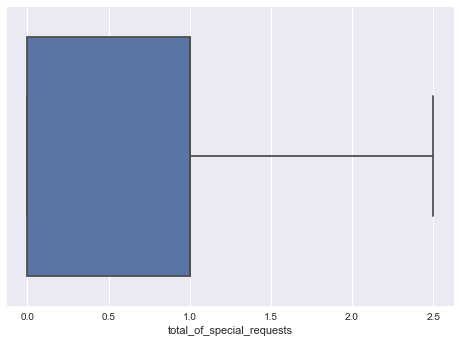

In [38]:
df.loc[(df['total_of_special_requests']>upper_bound_totalreq),'total_of_special_requests'] = upper_bound_totalreq
sns.boxplot(df['total_of_special_requests']);

In [39]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,City Hotel,0,6,July,27,0,2.0,1,0,0,...,0,No Deposit,0,Transient,0.0,0,0.0,Check-Out,2015-07-03,2015-07-01
1,City Hotel,1,88,July,27,0,4.0,2,0,0,...,0,No Deposit,0,Transient,76.5,0,1.0,Canceled,2015-07-01,2015-07-01
2,City Hotel,1,65,July,27,0,4.0,1,0,0,...,0,No Deposit,0,Transient,68.0,0,1.0,Canceled,2015-04-30,2015-07-01


### Data Preprocessing

In [40]:
df['hotel'].unique()

array(['City Hotel'], dtype=object)

In [41]:
hotel_name = {'hotel':{'City Hotel' : 1}}
df.replace(hotel_name, inplace=True)

In [42]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,1,0,6,July,27,0,2.0,1,0,0,...,0,No Deposit,0,Transient,0.0,0,0.0,Check-Out,2015-07-03,2015-07-01
1,1,1,88,July,27,0,4.0,2,0,0,...,0,No Deposit,0,Transient,76.5,0,1.0,Canceled,2015-07-01,2015-07-01
2,1,1,65,July,27,0,4.0,1,0,0,...,0,No Deposit,0,Transient,68.0,0,1.0,Canceled,2015-04-30,2015-07-01


In [43]:
df['meal'].unique()

array(['HB', 'BB', 'SC', 'FB'], dtype=object)

In [44]:
meal_name = {'meal':{'HB' : 1, 'BB' : 2, 'SC' : 3, 'FB' : 4}}
df.replace(meal_name, inplace=True)

In [45]:
pd.options.display.max_columns = None
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,1,0,6,July,27,0,2.0,1,0,0,1,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,0.0,0,0.0,Check-Out,2015-07-03,2015-07-01
1,1,1,88,July,27,0,4.0,2,0,0,2,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,76.5,0,1.0,Canceled,2015-07-01,2015-07-01
2,1,1,65,July,27,0,4.0,1,0,0,2,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,68.0,0,1.0,Canceled,2015-04-30,2015-07-01


In [46]:
df['market_segment'].unique()

array(['Offline TA/TO', 'Online TA', 'Groups', 'Complementary', 'Direct',
       'Corporate', 'Undefined', 'Aviation'], dtype=object)

In [47]:
df['market_segment'] = df['market_segment'].astype('category')
df['market_segment'].dtype

CategoricalDtype(categories=['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups',
                  'Offline TA/TO', 'Online TA', 'Undefined'],
                 ordered=False)

In [48]:
df['distribution_channel'].unique()

array(['TA/TO', 'Direct', 'Undefined', 'Corporate', 'GDS'], dtype=object)

In [49]:
df['reserved_room_type'].unique()

array(['A', 'B', 'D', 'F', 'E', 'G', 'C', 'P'], dtype=object)

In [50]:
df['reserved_room_type']= df['reserved_room_type'].astype('category')
df['reserved_room_type'].dtype
df['reserved_room_type']= df['reserved_room_type'].cat.codes
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,1,0,6,July,27,0,2.0,1,0,0,1,PRT,Offline TA/TO,TA/TO,0,0,0,0,A,0,No Deposit,0,Transient,0.0,0,0.0,Check-Out,2015-07-03,2015-07-01
1,1,1,88,July,27,0,4.0,2,0,0,2,PRT,Online TA,TA/TO,0,0,0,0,A,0,No Deposit,0,Transient,76.5,0,1.0,Canceled,2015-07-01,2015-07-01


In [51]:
df['assigned_room_type'].unique()

array(['A', 'B', 'F', 'D', 'G', 'E', 'K', 'C', 'P'], dtype=object)

In [52]:
df['assigned_room_type']= df['assigned_room_type'].astype('category')
df['assigned_room_type'].dtype
df['assigned_room_type']= df['assigned_room_type'].cat.codes
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,1,0,6,July,27,0,2.0,1,0,0,1,PRT,Offline TA/TO,TA/TO,0,0,0,0,0,0,No Deposit,0,Transient,0.0,0,0.0,Check-Out,2015-07-03,2015-07-01
1,1,1,88,July,27,0,4.0,2,0,0,2,PRT,Online TA,TA/TO,0,0,0,0,0,0,No Deposit,0,Transient,76.5,0,1.0,Canceled,2015-07-01,2015-07-01


In [53]:
df['deposit_type'].unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [54]:
df['deposit_type']= df['deposit_type'].astype('category')
df['deposit_type'].dtype
df['deposit_type']= df['deposit_type'].cat.codes
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,1,0,6,July,27,0,2.0,1,0,0,1,PRT,Offline TA/TO,TA/TO,0,0,0,0,0,0,0,0,Transient,0.0,0,0.0,Check-Out,2015-07-03,2015-07-01
1,1,1,88,July,27,0,4.0,2,0,0,2,PRT,Online TA,TA/TO,0,0,0,0,0,0,0,0,Transient,76.5,0,1.0,Canceled,2015-07-01,2015-07-01


In [55]:
df['customer_type'].unique()

array(['Transient', 'Transient-Party', 'Contract', 'Group'], dtype=object)

In [56]:
df['customer_type'] = df['customer_type'].astype('category')
df['customer_type'].dtype

CategoricalDtype(categories=['Contract', 'Group', 'Transient', 'Transient-Party'], ordered=False)

In [57]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [58]:
df['reservation_status']= df['reservation_status'].astype('category')
df['reservation_status'].dtype
df['reservation_status']= df['reservation_status'].cat.codes
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,1,0,6,July,27,0,2.0,1,0,0,1,PRT,Offline TA/TO,TA/TO,0,0,0,0,0,0,0,0,Transient,0.0,0,0.0,1,2015-07-03,2015-07-01
1,1,1,88,July,27,0,4.0,2,0,0,2,PRT,Online TA,TA/TO,0,0,0,0,0,0,0,0,Transient,76.5,0,1.0,0,2015-07-01,2015-07-01


In [59]:
df.describe()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
count,53428.0,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000
mean,1.0,0.300386,77.565977,26.637606,0.872164,2.226211,1.876338,0.131841,0.007337,2.124055,0.035768,0.191491,0.952478,1.231077,0.246369,0.016377,1.020233,110.894045,0.035618,0.691052,0.727615
std,0.0,0.458430,81.520119,13.586280,0.913756,1.372858,0.544292,0.442161,0.102665,0.462123,0.372784,2.038798,1.585825,1.735582,0.704063,0.129115,11.901703,42.297700,0.186244,0.778374,0.475601
min,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,14.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,84.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,50.000000,27.000000,1.000000,2.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.300000,0.000000,1.000000,1.000000
75%,1.0,1.000000,118.000000,37.000000,2.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000,1.000000
max,1.0,1.000000,460.000000,53.000000,16.000000,6.000000,4.000000,3.000000,10.000000,4.000000,21.000000,72.000000,7.000000,8.000000,21.000000,2.000000,391.000000,500.000000,3.000000,2.500000,2.000000


#### Berapa banyak booking yang dicancel/ tidak dicancel

In [60]:
print('Total Booking dicancel')
print(df.is_canceled.value_counts()[1])
print('Total Booking Tidak dicancel')
print(df.is_canceled.value_counts()[0])

Total Booking dicancel
16049
Total Booking Tidak dicancel
37379


In [61]:
df['is_canceled'].unique()

array([0, 1], dtype=int64)

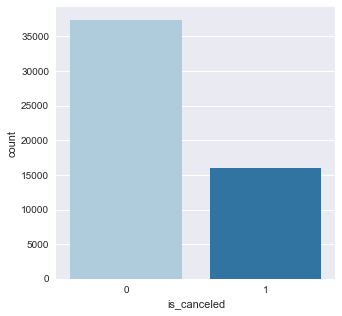

In [62]:
plt.figure(figsize=(5,5))

#dicancel=1, tidak dicancel= 0
sns.countplot(df['is_canceled'], palette='Paired')
plt.show()

#### Origin country of the guest

In [63]:
df.country.value_counts(normalize=True)

PRT    0.247455
FRA    0.138729
GBR    0.084750
DEU    0.083608
ESP    0.070824
         ...   
SLE    0.000019
NIC    0.000019
HND    0.000019
SYC    0.000019
KIR    0.000019
Name: country, Length: 166, dtype: float64

In [64]:
print('Most common countries:')
print(df.country.value_counts().head(3))

Most common countries:
PRT    13221
FRA     7412
GBR     4528
Name: country, dtype: int64


The average guest staying is come from Portugal, France and the UK

#### Average room price per night

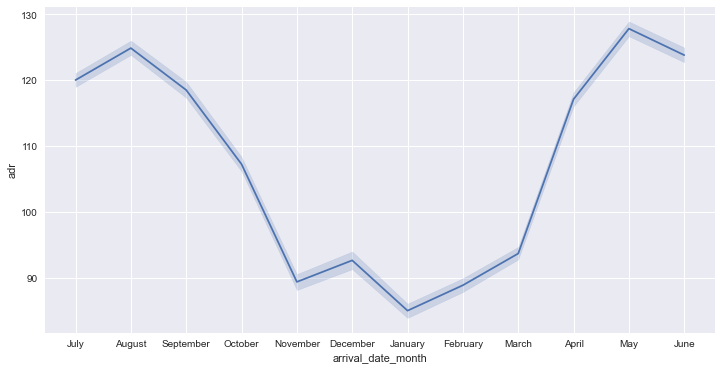

In [65]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', data= df)
plt.show()

Hotel costs per night will start to rise from April to August due to the summer holidays.

#### Average length of stay

In [66]:
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
num_nights = list(df["total_nights"].value_counts().index)
num_bookings = list(df["total_nights"].value_counts())
percent_bookings = df["total_nights"].value_counts() / sum(num_bookings) * 100
lama_menginap = pd.DataFrame({ "jumlah_malam": num_nights,"percentase_tamu": percent_bookings})

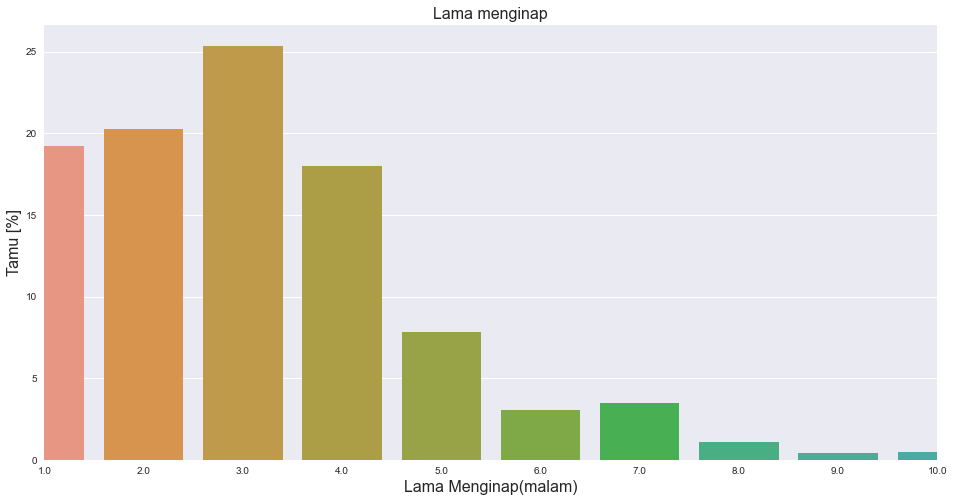

In [67]:
plt.figure(figsize=(16, 8))
sns.barplot(x = "jumlah_malam", y = "percentase_tamu", data=lama_menginap)
plt.title("Lama menginap", fontsize=16)
plt.xlabel("Lama Menginap(malam)", fontsize=16)
plt.ylabel("Tamu [%]", fontsize=16)
plt.xlim(1,10)
plt.show()

The average guest stays for 1-4 nights

#### Market Segment in hotel

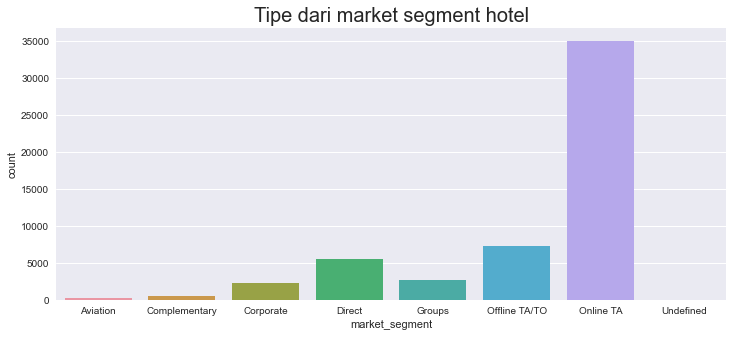

In [68]:
plt.figure(figsize=(12,5))
sns.countplot(data = df, x = 'market_segment').set_title('Tipe dari market segment hotel', fontsize = 20);

The average hotel booking transaction is done through online travel agents

In [69]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_nights
0,1,0,6,July,27,0,2.0,1,0,0,1,PRT,Offline TA/TO,TA/TO,0,0,0,0,0,0,0,0,Transient,0.0,0,0.0,1,2015-07-03,2015-07-01,2.0
1,1,1,88,July,27,0,4.0,2,0,0,2,PRT,Online TA,TA/TO,0,0,0,0,0,0,0,0,Transient,76.5,0,1.0,0,2015-07-01,2015-07-01,4.0


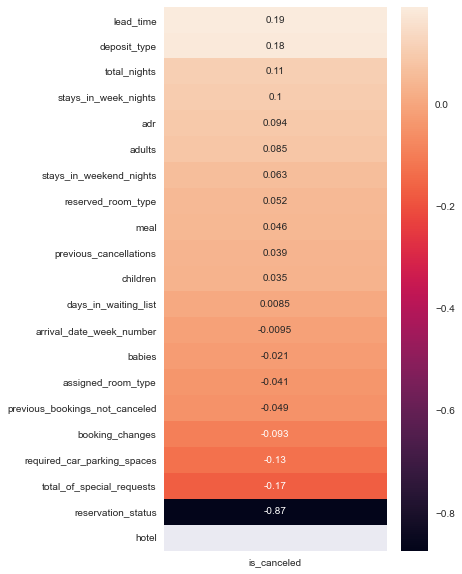

In [70]:
plt.figure(figsize=(5, 10))
sns.heatmap(df.corr().sort_values('is_canceled', ascending=False)[['is_canceled']][1:], annot=True);

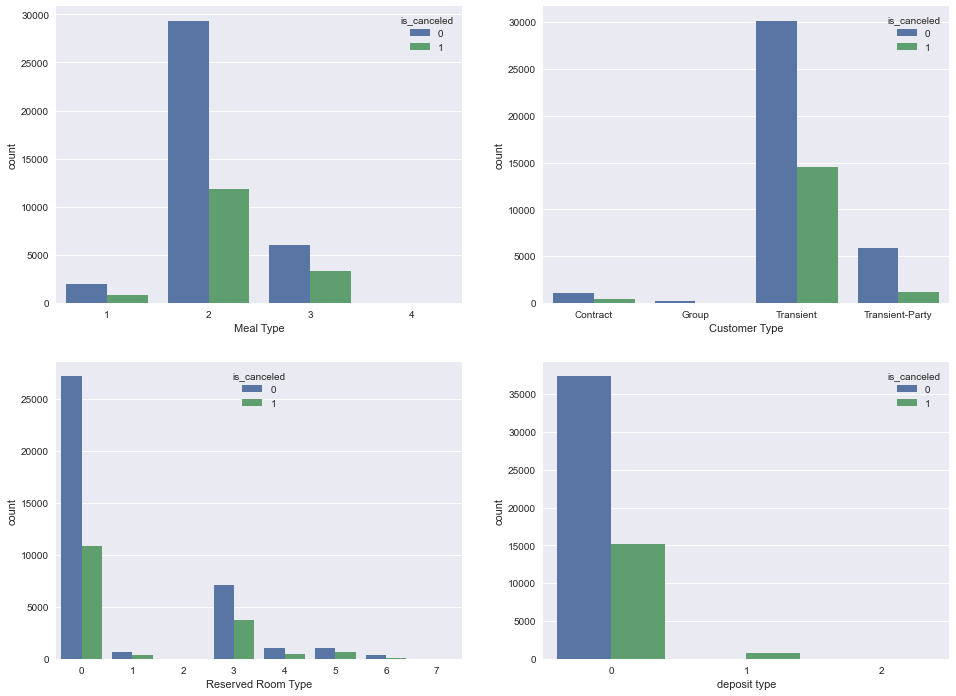

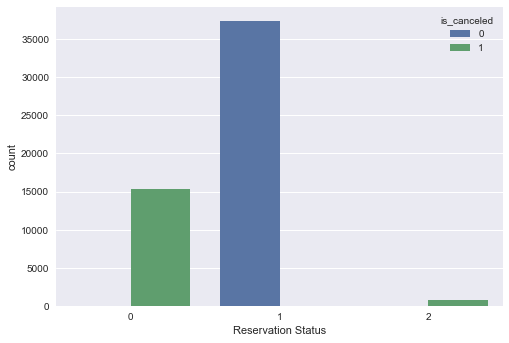

In [71]:
plt.figure(figsize=(16,12))
plt.subplot(221)
sns.countplot(df['meal'], hue=df['is_canceled'])
plt.xlabel('Meal Type')
plt.subplot(222)
sns.countplot(df['customer_type'], hue=df['is_canceled'])
plt.xlabel('Customer Type')
plt.subplot(223)
sns.countplot(df['reserved_room_type'], hue=df['is_canceled'])
plt.xlabel('Reserved Room Type')
plt.subplot(224)
sns.countplot(df['deposit_type'], hue=df['is_canceled'])
plt.xlabel('deposit type')
plt.show(225)
sns.countplot(df['reservation_status'], hue=df['is_canceled'])
plt.xlabel('Reservation Status')
plt.show()

We can see from the two diagrams,
1. data meal and reserved room type do not have booking data that is spread evenly. The data and the deposit type data also refer to one category. that reason will be used as the basis for not using the column.
2. reservation status is also not used because its purpose is the same as data is canceled. later it will even become 2 targets when making predictions.
3. country will be omitted because it has many dimensions.
4. Date data will also be removed and only month data will be used.
5. hotel data will be omitted because it only has 1 category so it will not provide significant information on the process to be carried out.

In [72]:
df = df.drop(['hotel','meal','country','reserved_room_type','assigned_room_type','deposit_type','reservation_status','reservation_status_date','arrival_date'], axis=1)

In [73]:
df = pd.concat([df,pd.get_dummies(df['distribution_channel'], drop_first=True),pd.get_dummies(df['customer_type'], drop_first=True),pd.get_dummies(df['arrival_date_month'], drop_first=True),pd.get_dummies(df['market_segment'], drop_first=True)], axis=1)

In [74]:
df = df.drop(['arrival_date_month','market_segment','distribution_channel','customer_type'], axis=1)

#### Model Building

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53428 entries, 0 to 79329
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     53428 non-null  int64  
 1   lead_time                       53428 non-null  int64  
 2   arrival_date_week_number        53428 non-null  int64  
 3   stays_in_weekend_nights         53428 non-null  int64  
 4   stays_in_week_nights            53428 non-null  float64
 5   adults                          53428 non-null  int64  
 6   children                        53428 non-null  int64  
 7   babies                          53428 non-null  int64  
 8   is_repeated_guest               53428 non-null  object 
 9   previous_cancellations          53428 non-null  int64  
 10  previous_bookings_not_canceled  53428 non-null  int64  
 11  booking_changes                 53428 non-null  int64  
 12  days_in_waiting_list            

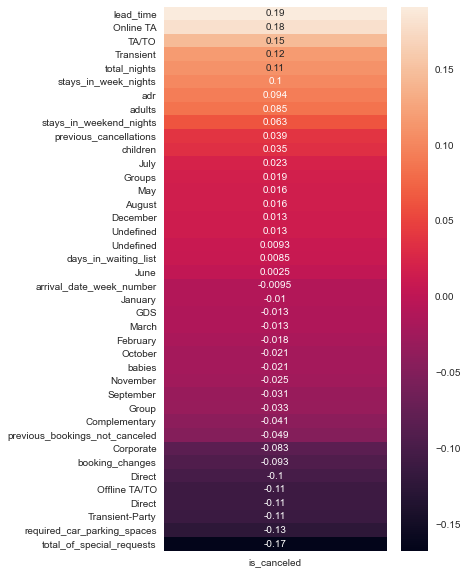

In [76]:
plt.figure(figsize=(5, 10))
sns.heatmap(df.corr().sort_values('is_canceled', ascending=False)[['is_canceled']][1:], annot=True);

In [77]:
df.describe()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_nights,Direct,GDS,TA/TO,Undefined,Group,Transient,Transient-Party,August,December,February,January,July,June,March,May,November,October,September,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
count,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000,53428.000000
mean,0.300386,77.565977,26.637606,0.872164,2.226211,1.876338,0.131841,0.007337,0.035768,0.191491,0.246369,1.020233,110.894045,0.035618,0.691052,3.098375,0.113929,0.003388,0.833814,0.000075,0.005072,0.835536,0.131860,0.123362,0.056412,0.067474,0.051097,0.107509,0.093677,0.090889,0.101314,0.055065,0.078760,0.079359,0.009602,0.041682,0.104047,0.049319,0.136090,0.654975,0.000037
std,0.458430,81.520119,13.586280,0.913756,1.372858,0.544292,0.442161,0.102665,0.372784,2.038798,0.704063,11.901703,42.297700,0.186244,0.778374,1.790813,0.317728,0.058106,0.372251,0.008652,0.071040,0.370700,0.338341,0.328856,0.230718,0.250843,0.220197,0.309762,0.291382,0.287453,0.301747,0.228109,0.269367,0.270301,0.097518,0.199864,0.305324,0.216535,0.342887,0.475381,0.006118
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,14.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,84.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,50.000000,27.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.300000,0.000000,1.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,118.000000,37.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,460.000000,53.000000,16.000000,6.000000,4.000000,3.000000,10.000000,21.000000,72.000000,21.000000,391.000000,500.000000,3.000000,2.500000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### train and test data

Lead time has the highest correlation compared to other variables

In [78]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [79]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##### Scaling

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [83]:
rf = RandomForestClassifier()
svm = SVC()
lr = LogisticRegression()

In [84]:
models = [rf, svm, lr]

for model in models:
    model.fit(X_train, y_train)

In [85]:
ypred_rf = rf.predict(X_test)
ypred_svm = svm.predict(X_test)
ypred_lr = lr.predict(X_test)

In [86]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

model_accuracy_results = {}
def model_accuracy(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = ((cm[0,0] + cm [1,1]) * 100 / len(y_test)).round(2)
    return accuracy

#### Logistic Regression

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      7520
           1       0.67      0.38      0.49      3166

    accuracy                           0.76     10686
   macro avg       0.72      0.65      0.67     10686
weighted avg       0.75      0.76      0.74     10686



Text(52.0, 0.5, 'Actual Label')

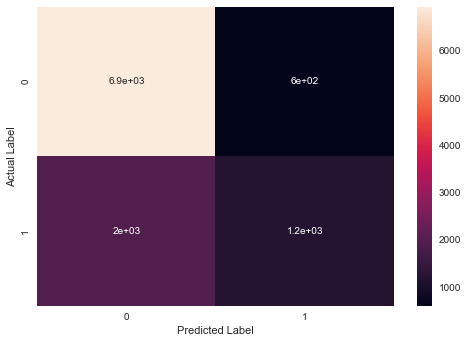

In [87]:
print(classification_report(y_test, ypred_lr))
sns.heatmap(confusion_matrix(y_test, ypred_lr), annot = True)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

In [88]:
model_accuracy_results['LogisticRegression'] = model_accuracy(y_test, ypred_lr)

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      7520
           1       0.67      0.38      0.49      3166

    accuracy                           0.76     10686
   macro avg       0.72      0.65      0.67     10686
weighted avg       0.75      0.76      0.74     10686



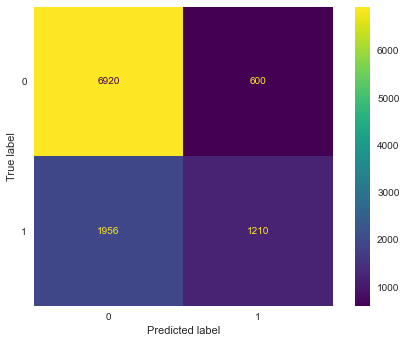

In [89]:
plot_confusion_matrix(lr, X_test, y_test)
print(classification_report(y_test, ypred_lr))
plt.grid(False)

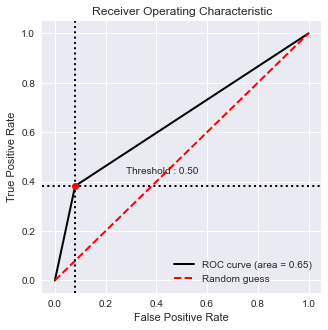

In [90]:
from plot_metric.functions import BinaryClassification
bc = BinaryClassification(y_test, ypred_lr, labels=["Class 0", "Class 1"])
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

#### Random Forest

              precision    recall  f1-score   support

           0       0.82      0.90      0.85      7520
           1       0.68      0.52      0.59      3166

    accuracy                           0.78     10686
   macro avg       0.75      0.71      0.72     10686
weighted avg       0.77      0.78      0.77     10686



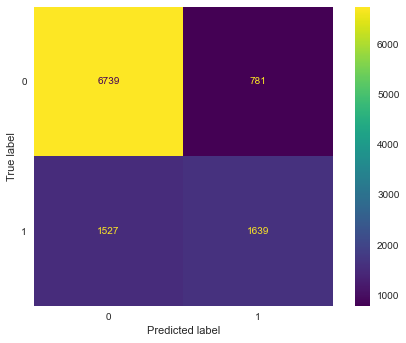

In [91]:
plot_confusion_matrix(rf, X_test, y_test)
print(classification_report(y_test, ypred_rf))
plt.grid(False)

              precision    recall  f1-score   support

           0       0.82      0.90      0.85      7520
           1       0.68      0.52      0.59      3166

    accuracy                           0.78     10686
   macro avg       0.75      0.71      0.72     10686
weighted avg       0.77      0.78      0.77     10686



Text(52.0, 0.5, 'Actual Label')

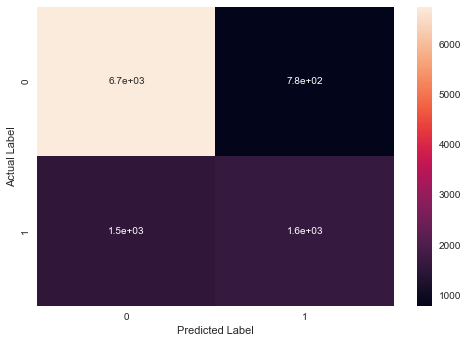

In [92]:
print(classification_report(y_test, ypred_rf))
sns.heatmap(confusion_matrix(y_test, ypred_rf), annot = True)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

In [93]:
model_accuracy_results['Random Forest'] = model_accuracy(y_test, ypred_rf)

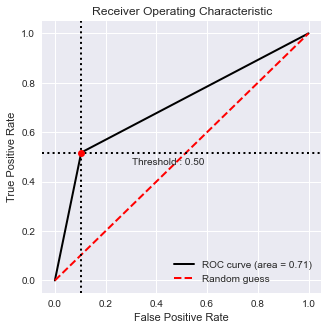

In [94]:
bc = BinaryClassification(y_test, ypred_rf, labels=["Class 0", "Class 1"])

plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

#### SVM

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      7520
           1       0.65      0.43      0.52      3166

    accuracy                           0.76     10686
   macro avg       0.72      0.67      0.68     10686
weighted avg       0.75      0.76      0.75     10686



Text(52.0, 0.5, 'Actual Label')

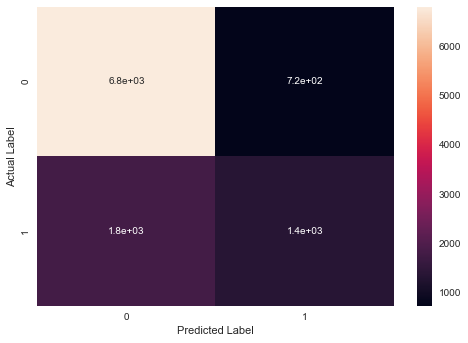

In [95]:
print(classification_report(y_test, ypred_svm))
sns.heatmap(confusion_matrix(y_test, ypred_svm), annot = True)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      7520
           1       0.65      0.43      0.52      3166

    accuracy                           0.76     10686
   macro avg       0.72      0.67      0.68     10686
weighted avg       0.75      0.76      0.75     10686



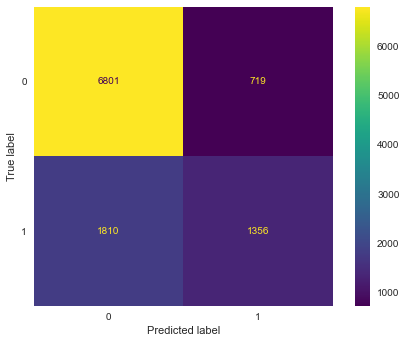

In [96]:
plot_confusion_matrix(svm, X_test, y_test)
print(classification_report(y_test, ypred_svm))
plt.grid(False)

In [97]:
model_accuracy_results['SVM'] = model_accuracy(y_test, ypred_svm)

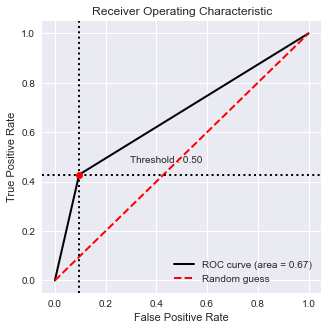

In [98]:
bc = BinaryClassification(y_test, ypred_svm, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

#### knearest neighbors

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      7520
           1       0.59      0.47      0.52      3166

    accuracy                           0.75     10686
   macro avg       0.69      0.67      0.68     10686
weighted avg       0.74      0.75      0.74     10686



Text(52.0, 0.5, 'Actual Label')

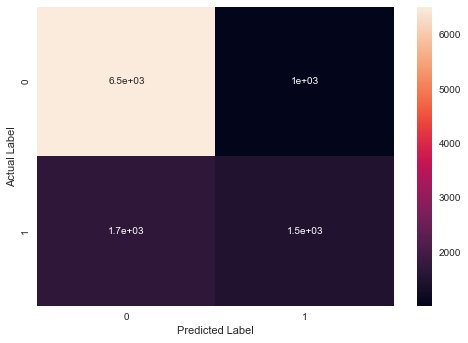

In [101]:
y_pred_knn = model.predict(X_test)
print(classification_report(y_test, y_pred_knn))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot = True)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      7520
           1       0.59      0.47      0.52      3166

    accuracy                           0.75     10686
   macro avg       0.69      0.67      0.68     10686
weighted avg       0.74      0.75      0.74     10686



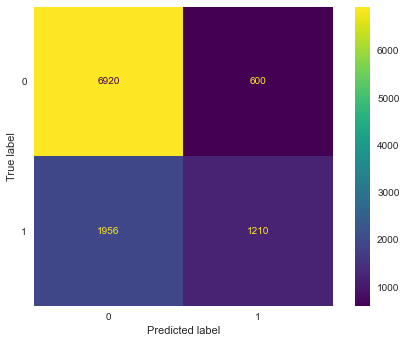

In [102]:
plot_confusion_matrix(lr, X_test, y_test)
print(classification_report(y_test, y_pred_knn))
plt.grid(False)

In [103]:
model_accuracy_results['KNearestNeighbors'] = model_accuracy(y_test, y_pred_knn)

In [104]:
pd.DataFrame(data = [model.score(X_train, y_train)*100,
                    model.score(X_test, y_test)*100],
            index = ['Model Score in Data Train', 'Model Score in Data Test'],
            columns = ['Score (%)'])

,Score (%)
Model Score in Data Train,81.977914
Model Score in Data Test,74.798802


### Evaluation

In [105]:
from sklearn.model_selection import RandomizedSearchCV

In [106]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [i for i in range(1,100,5)],
            'criterion' : ['gini', 'entropy'],
            'max_features' : ['auto', 'sqrt', 'log2'],
            'n_jobs' : [-1]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1.0, 2.0, 4.0, 6.0, 8.0, 10.0],
            'penalty' : ['l1', 'l2', 'elasticnet'],
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class' : ['auto', 'ovr', 'multinomial'],
            'n_jobs' : [-1]
        }
    }
}

In [107]:
df_model_accuracies = pd.DataFrame(list(model_accuracy_results.values()), index=model_accuracy_results.keys(), columns=['Accuracy'])
df_model_accuracies

,Accuracy
LogisticRegression,76.08
Random Forest,78.40
SVM,76.33
KNearestNeighbors,74.80


In [108]:
%%time
scores = []

for model_name, mp in model_params.items():
    clf_random =  RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf_random.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf_random.best_score_,
        'best_params': clf_random.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Wall time: 4min 51s


,model,best_score,best_params
0,random_forest,0.583027,"{'n_jobs': -1, 'n_estimators': 6, 'max_feature..."
1,logistic_regression,0.687785,"{'solver': 'saga', 'penalty': 'l1', 'n_jobs': ..."


In [109]:
df['best_params'][1]

{'solver': 'saga',
 'penalty': 'l1',
 'n_jobs': -1,
 'multi_class': 'ovr',
 'C': 8.0}

In [110]:
model = LogisticRegression(C=8.0, multi_class='ovr', penalty='l1', solver='saga', n_jobs=-1)

In [112]:
model.fit(X, y)

LogisticRegression(C=8.0, multi_class='ovr', n_jobs=-1, penalty='l1',
                   solver='saga')

In [116]:
ypred_lr = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.70      1.00      0.83      7520
           1       0.29      0.00      0.00      3166

    accuracy                           0.70     10686
   macro avg       0.50      0.50      0.41     10686
weighted avg       0.58      0.70      0.58     10686



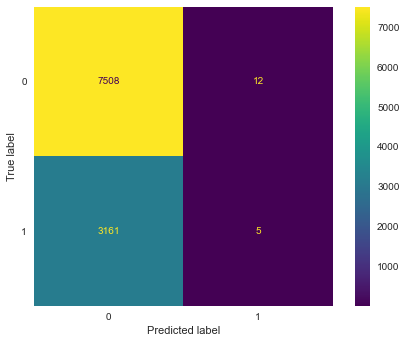

In [117]:
plot_confusion_matrix(model, X_test, y_test)
print(classification_report(y_test, ypred_lr))
plt.grid(False)

#### mistakes that greatly affect the company's losses
An error that will affect the company's loss is when the prediction results state that the guest will not cancel even though they will cancel. Prediction of the false positive area.
The hotel will think that the guest will not cancel so that they take further actions such as reserving a hotel room. So that later when the cancellation is made, the room that should be filled or can be offered to other guests, even becomes empty due to an error in predicting the possibility of canceling the transaction.

If based on accuracy, indeed random forest has high accuracy but random forest has a higher number of false positives than logistic regression and k nearest neighbor. so that based on the specify evaluation, it is better to use logistic regression or k nearest neighbor to make predictions so that the number of predictions against false positives can be suppressed and minimize the company's losses due to making room reservations to customers who are predicted not to do but instead cancel transactions.